# Classifying Reuters Newswires

In [7]:
from keras import models
from keras import layers
from keras.datasets import reuters
import numpy as np

In [25]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

print('# of Training Samples: {}'.format(len(x_train)))
print('# of Test Samples: {}'.format(len(x_test)))

# of Training Samples: 8982
# of Test Samples: 2246


News Topics:
```
"reuters":
  ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead'],
```

In [15]:
num_classes = max(y_train) + 1
print('# of Classes: {}'.format(num_classes))

# of Training Samples: 8982
# of Test Samples: 2246
# of Classes: 46

index_to_word = {}
for key, value in word_index.items():
    index_to_word[value] = key
    
print(' '.join([index_to_word[x] for x in x_train[0]]))
print(y_train[0])

# of Classes: 46
the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs
3


In [26]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

display(y_train[0, :])
display(y_test[0, :])

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
x_train_oh = np.zeros((len(x_train), 10000))
for i in np.arange(x_train.shape[0]):
    x_train_oh[i, np.array(x_train[i])] = 1.
    
display(x_train_oh[0])
display(y_train[0])

x_test_oh = np.zeros((len(x_test), 10000))
for i in np.arange(x_test.shape[0]):
    x_test_oh[i, np.array(x_test[i])] = 1.
    
display(x_test_oh[0])
display(y_test[0])

array([0., 1., 1., ..., 0., 0., 0.])

3

array([0., 1., 1., ..., 0., 0., 0.])

3

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train_oh, y_train, batch_size=256, epochs=10, verbose=1, validation_split=0.1)
score = model.evaluate(x_test_oh, y_test, batch_size=256, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 1s 124us/step - loss: 2.7535 - acc: 0.5315 - val_loss: 1.9084 - val_acc: 0.6741
Epoch 2/10
8083/8083 [==============================] - 1s 66us/step - loss: 1.3438 - acc: 0.7387 - val_loss: 1.3171 - val_acc: 0.7353
Epoch 3/10
8083/8083 [==============================] - 1s 66us/step - loss: 0.8812 - acc: 0.8248 - val_loss: 1.1119 - val_acc: 0.7742
Epoch 4/10
8083/8083 [==============================] - 1s 66us/step - loss: 0.6477 - acc: 0.8767 - val_loss: 1.0169 - val_acc: 0.7942
Epoch 5/10
8083/8083 [==============================] - 1s 66us/step - loss: 0.4941 - acc: 0.9071 - val_loss: 0.9629 - val_acc: 0.7964
Epoch 6/10
8083/8083 [==============================] - 1s 66us/step - loss: 0.3891 - acc: 0.9228 - val_loss: 0.9247 - val_acc: 0.8042
Epoch 7/10
8083/8083 [==============================] - 1s 66us/step - loss: 0.3116 - acc: 0.9378 - val_loss: 0.9037 - val_acc: 0.8042
Epoch 8

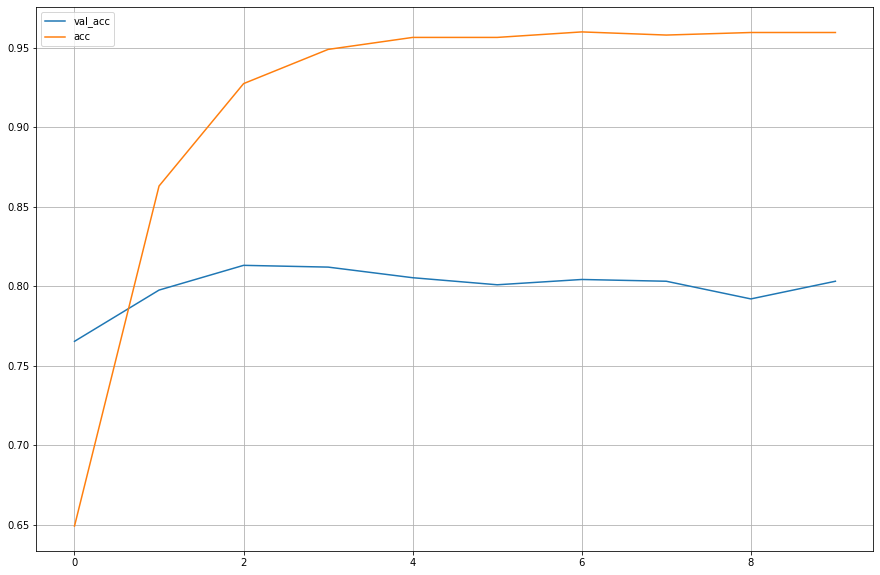

In [39]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.grid()
plt.show()